# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

import functions
import importlib
importlib.reload(functions)

import warnings

# **Display**

In [2]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option('display.max_rows', 200)

size = 20

# **Variables**

In [3]:
random_state = 101
target = 'TARGET'

# **Load Data**

In [4]:
train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\application_train.csv",
    index_col=False
)


test = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\application_test.csv",
    index_col=False
)

## **Reduce Memory Usage**

In [5]:
app_train = functions.reduce_memory_usage(train)

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%


In [6]:
app_test = functions.reduce_memory_usage(test)

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%


# **Feature Engineering**

## **Polynomial Features**

In [21]:
# Make some polynomial features starting from EXT_SOURCES and DAYS_BIRTH
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']] # Make a new training dataframe
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']] # Make a new test dataframe

# Handle missing values
imputer = SimpleImputer(strategy="median") # Initialize imputer
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns=['TARGET'])

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.fit_transform(poly_features_test)

# Polynomial features
poly_transformer = PolynomialFeatures(degree=3) # Initialize polynomial features object
poly_transformer.fit(poly_features) # Train object
poly_features = poly_transformer.transform(poly_features) # Transform training df
poly_features_test = poly_transformer.transform(poly_features_test) # Transform test df

print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [17]:
import pandas as pd

# Assuming poly_transformer and poly_features are already defined
# Create a DataFrame from the polynomial features
poly_features_df = pd.DataFrame(poly_features, 
                                columns=poly_transformer.get_feature_names_out(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add back the target variable to the DataFrame (optional)
poly_features_df['TARGET'] = poly_target.values

# Display the first few rows of the new DataFrame
poly_features_df.head()


,1,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2,EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3^2,EXT_SOURCE_3 DAYS_BIRTH,DAYS_BIRTH^2,EXT_SOURCE_1^3,EXT_SOURCE_1^2 EXT_SOURCE_2,EXT_SOURCE_1^2 EXT_SOURCE_3,EXT_SOURCE_1^2 DAYS_BIRTH,EXT_SOURCE_1 EXT_SOURCE_2^2,EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_1 EXT_SOURCE_3^2,EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_1 DAYS_BIRTH^2,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3,TARGET
0,1.0,0.083008,0.262939,0.139404,-9461.0,0.006890,0.021826,0.011572,-785.336914,0.069137,0.036655,-2487.670166,0.019434,-1318.904053,89510520.0,0.000572,0.001812,0.000961,-65.189102,0.005739,0.003043,-206.496063,0.001613,-109.479340,7430072.5,0.018179,0.009638,-654.106628,0.005110,-346.791901,23535848.0,0.002709,-183.860886,12478151.0,-8.468590e+11,1
1,1.0,0.311279,0.622070,0.535156,-16765.0,0.096895,0.193638,0.166583,-5218.597656,0.386971,0.332905,-10429.008789,0.286392,-8971.894531,281065216.0,0.030161,0.060275,0.051854,-1624.441406,0.120456,0.103626,-3246.334473,0.089148,-2792.765137,87489784.0,0.240723,0.207090,-6487.576660,0.178156,-5581.149414,174842320.0,0.153265,-4801.365234,150413808.0,-4.712058e+12,0
2,1.0,0.505859,0.556152,0.729492,-19046.0,0.255894,0.281335,0.369020,-9634.597656,0.309305,0.405709,-10592.477539,0.532159,-13893.908203,362750112.0,0.129446,0.142316,0.186672,-4873.751465,0.156465,0.205232,-5358.304199,0.269198,-7028.363770,183500544.0,0.172021,0.225636,-5891.031250,0.295961,-7727.129395,201744320.0,0.388206,-10135.497070,264623376.0,-6.908939e+12,0
3,1.0,0.505859,0.650391,0.535156,-19005.0,0.255894,0.329006,0.270714,-9613.857422,0.423008,0.348061,-12360.673828,0.286392,-10170.644531,361190016.0,0.129446,0.166431,0.136943,-4863.259766,0.213983,0.176070,-6252.762695,0.144874,-5144.916016,182711360.0,0.275120,0.226375,-8039.266602,0.186267,-6614.892090,234914608.0,0.153265,-5442.883789,193293088.0,-6.864416e+12,0
4,1.0,0.505859,0.322754,0.535156,-19932.0,0.255894,0.163268,0.270714,-10082.789062,0.104170,0.172724,-6433.130859,0.286392,-10666.734375,397284608.0,0.129446,0.082591,0.136943,-5100.473145,0.052695,0.087374,-3254.259521,0.144874,-5395.867676,200970144.0,0.033621,0.055747,-2076.318115,0.092434,-3442.730225,128225160.0,0.153265,-5708.369629,212609344.0,-7.918677e+12,0


In [15]:
# Check correlations among polynomial features
poly_features = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])) # Create a dataframe
poly_features['TARGET'] = poly_target # Put back target column

poly_corr = poly_features.corr()['TARGET'].sort_values() # Find correlations with target

print("Most positive correlations:\n", poly_corr.tail(10))
print("\n Most negative correlations:\n", poly_corr.head(10))

Most positive correlations:
 EXT_SOURCE_1 DAYS_BIRTH                 0.104888
EXT_SOURCE_3^2 DAYS_BIRTH               0.141778
EXT_SOURCE_2^2 DAYS_BIRTH               0.149312
EXT_SOURCE_3 DAYS_BIRTH                 0.150113
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH    0.151821
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155889
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181284
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64

 Most negative correlations:
 EXT_SOURCE_2 EXT_SOURCE_3                -0.193940
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189601
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176429
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172279
EXT_SOURCE_1 EXT_SOURCE_2                -0.166621
EXT_SOURCE_1 EXT_SOURCE_3                -0.164072
EXT_SOURCE_2                             -0.160294
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156864
EXT_SOURCE_3 

In [ ]:
# Make a copy of train/test_app with new features
poly_features_test = pd.DataFrame(poly_features_test, columns=poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])) # Create a dataframe for test

poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR'] # Add index column to poly train
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR'] # Add index column to poly test

app_train_poly = app_train.merge(poly_features, on='SK_ID_CURR', how='left') # Merge train
app_test_poly = app_test.merge(poly_features_test, on='SK_ID_CURR', how='left') # Merge test

app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join="inner", axis=1) # keep only common columns
app_train_poly['TARGET'] = poly_target # put back the target column
print("Training Poly shape: ", app_train_poly.shape)
print("Test Poly shape: ", app_test_poly.shape)

## **Domain Knowledge Features**

In [24]:
# Make new financial features
app_train_domain = app_train.copy() # Copy app_train/test
app_test_domain = app_test.copy()

# New features for training
app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL'] # Percentage of the credit amount relative to a client's income
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL'] # Percentage of the loan annuity relative to a client's income
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT'] # length of the payment in months (since the annuity is the monthly amount due)
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH'] # Percentage of the days employed relative to the client's age

# Same features for test
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

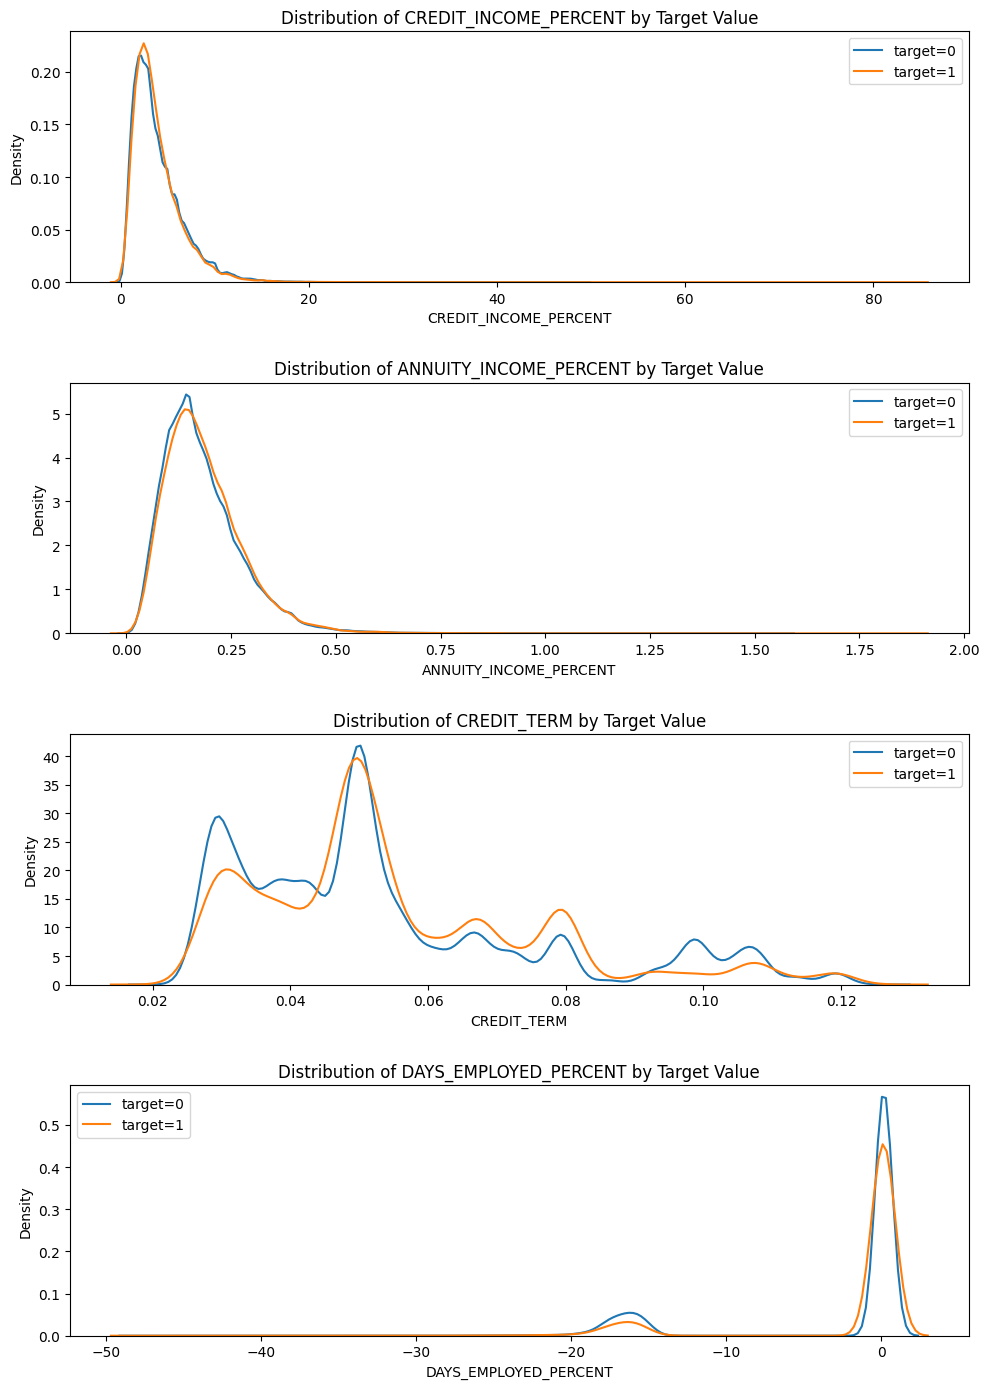

In [26]:
# Plot the new variables
plt.figure(figsize=(10,14))

for i, var in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4,1,i+1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0, var], label='target=0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1, var], label='target=1')
    
    plt.title('Distribution of {} by Target Value'.format(var))
    plt.xlabel('{}'.format(var));
    plt.ylabel('Density');
    plt.legend();
    
plt.tight_layout(h_pad = 2.5)

## **External Source Features**

In [ ]:
def ext_features(data):    
  data['EXT_SOURCE_MEAN'] = (data['EXT_SOURCE_1'] + data['EXT_SOURCE_2'] + data['EXT_SOURCE_3'] ) / 3
  data['EXT_SOURCE_MUL'] = data['EXT_SOURCE_1'] * data['EXT_SOURCE_2'] * data['EXT_SOURCE_3'] 
  data['EXT_SOURCE_MAX'] = [max(ele1,ele2,ele3) for ele1, ele2, ele3 in zip(data['EXT_SOURCE_1'], data['EXT_SOURCE_2'], data['EXT_SOURCE_3'])]
  data['EXT_SOURCE_MIN'] = [min(ele1,ele2,ele3) for ele1, ele2, ele3 in zip(data['EXT_SOURCE_1'], data['EXT_SOURCE_2'], data['EXT_SOURCE_3'])]
  data['EXT_SOURCE_VAR'] = [np.var([ele1,ele2,ele3]) for ele1, ele2, ele3 in zip(data['EXT_SOURCE_1'], data['EXT_SOURCE_2'], data['EXT_SOURCE_3'])]
  data['WEIGHTED_EXT_SOURCE'] =  data.EXT_SOURCE_1 * 2 + data.EXT_SOURCE_2 * 3 + data.EXT_SOURCE_3 * 4
  
  return data
